# Assignment 3



Dalam notebook ini, akan dilakukan pengembangan model Machine Learning menggunakan data e-learning 2020. Penentuan kelulusan e-learning adalah berdasarkan nilai dari POST TEST, sedangkan dalam model yang akan dikembangkan ini, akan coba dilakukan prediksi untuk menentukan kelulusan e-learning berdasarkan feature lain yang ada dalam data tersebut. Dalam pengembangan model ini akan dibandingkan apabila model penentuan kelulusan menggunakan algoritma Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, dan Random Forest.

Secara garis besar, yang akan dilakukan dalam notebook ini adalah sebagai berikut:
1. Preprocessing Data
2. Logistic Regression
3. K-Nearest Neighbor (KNN)
4. Support Vector Machine (SVM)
5. Naive Bayes
6. Decision Tree
7. Random Forest
8. Visualization
9. Conclusion

## Preprocessing Data

Preprocessing data dilakukan mulai dari importing libraries yang diperlukan, load data, dan data cleaning

In [1]:
# Import library dasar yang digunakan
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import library sci-kit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
# Read csv data
df = pd.read_csv('dataset/ELearn_2020.csv')
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BULAN,USERNAME,CFU/FU,DIVISI,NAME,SURNAME,HCBP,COURSE,TGL PRE TEST,PRE TEST,TGL POST TEST,POST TEST,STATUS,JOB FAMILY,Unnamed: 14,Unnamed: 15
0,1,120180321,CFU CONSUMER,DIV-TR7,NURFAINI ROFIFAH,-120180321,HCBP 1,9 Core Element of Marketing,2020-01-24,40,-,-,BELUM AKSES,EL - Commerce &amp; Relations,NaN,NaN
1,1,625140,CFU CONSUMER,DIV-TR2,SAMAD PANENGKE,-625140,HCBP 1,PT - 2 Project,2020-01-29,80,2020-01-31,100,LULUS,NaN,NaN,NaN
2,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-27,70,2020-01-28,93.33,LULUS,NaN,NaN,NaN
3,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-27,40,2020-01-28,100,LULUS,NaN,NaN,NaN
4,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,DigiERP,2020-01-28,80,2020-01-28,85,LULUS,NaN,NaN,NaN
5,1,625146,CFU CONSUMER,DIV-TR2,BAHRUDIN,-625146,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-22,90,2020-01-22,93.33,LULUS,NaN,NaN,NaN
6,1,625146,CFU CONSUMER,DIV-TR2,BAHRUDIN,-625146,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-22,80,2020-01-22,80,LULUS,NaN,NaN,NaN
7,1,625146,CFU CONSUMER,DIV-TR2,BAHRUDIN,-625146,HCBP 1,DigiERP,2020-01-22,80,2020-01-22,85,LULUS,NaN,NaN,NaN
8,1,625154,CFU CONSUMER,DIV-TR2,MUHIZAT SYEH IRIANTO,-625154,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-23,80,2020-01-28,73.33,LULUS,NaN,NaN,NaN
9,1,625154,CFU CONSUMER,DIV-TR2,MUHIZAT SYEH IRIANTO,-625154,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-23,90,2020-01-28,86.67,LULUS,NaN,NaN,NaN


In [3]:
# Drop kolom yang tidak memiliki value seperti 'Unnamed: 14' dan 'Unnamed: 15'
df.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)
df.shape

(289057, 14)

In [4]:
# Karena kita akan mengembangkan model terkait kelulusan e-learning, ambil data yang memiliki value 'LULUS' atau 'TIDAK LULUS' dalam kolom 'STATUS KELULUSAN'
df_clean = df[(df['STATUS'] == 'LULUS') | (df['STATUS'] == 'TIDAK LULUS')]
df_clean.shape

(184222, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289057 entries, 0 to 289056
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   BULAN          289057 non-null  int64 
 1   USERNAME       289057 non-null  object
 2   CFU/FU         288919 non-null  object
 3   DIVISI         288918 non-null  object
 4   NAME           289054 non-null  object
 5   SURNAME        289057 non-null  object
 6   HCBP           288742 non-null  object
 7   COURSE         289057 non-null  object
 8   TGL PRE TEST   284910 non-null  object
 9   PRE TEST       284910 non-null  object
 10  TGL POST TEST  284910 non-null  object
 11  POST TEST      289057 non-null  object
 12  STATUS         289057 non-null  object
 13  JOB FAMILY     189474 non-null  object
dtypes: int64(1), object(13)
memory usage: 30.9+ MB


Kita akan mengembangkan model kelulusan e-learning berdasarkan 'CFU/FU', 'DIVISI', 'HCBP', dan nilai 'PRE TEST'. Oleh karena itu kita akan membuang data-data yang tidak diperlukan

In [6]:
# Drop data yang tidak diperlukan
df_clean.drop(['BULAN', 'USERNAME', 'NAME', 'SURNAME', 'COURSE', 'TGL PRE TEST', 'TGL POST TEST', 'JOB FAMILY', 'POST TEST'], axis=1, inplace=True)

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
# Cek kenapa Pre Test dikategorikan sebagai object
df_clean['PRE TEST'].value_counts()

-        34289
80       21703
60       18496
70       18293
100      17884
         ...  
42.22        1
24.17        1
2.67         1
90.83        1
34.17        1
Name: PRE TEST, Length: 121, dtype: int64

Ternyata diketahui bahwa ada nilai '-' di kolom Pre Test. Nilai ini perlu kita convert dulu ke NaN sehingga dapat dibersihkan dan kemudian kita konversi ke numeric value

In [8]:
# Konversi nilai '-' pada kolom Pre Test menjadi NaN
df_clean['PRE TEST'].replace('-', np.nan, inplace=True)

df_clean.isnull().sum()

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


CFU/FU        105
DIVISI        112
HCBP          275
PRE TEST    34289
STATUS          0
dtype: int64

In [9]:
# Drop missing value pada dataframe df_clean
df_clean.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Konversi value dalam masing-masing kolom agar dapat diolah untuk pengembangan model
# Konversi nilai Pre Test menjadi numeric
df_clean['PRE TEST'] = pd.to_numeric(df_clean['PRE TEST'])

# Konversi categorical value dalam kolom CFU/FU, DIVISI, dan HCBP menjadi numeric
from sklearn.preprocessing import LabelEncoder

object_cols = ['CFU/FU','DIVISI','HCBP']

label_encoder = LabelEncoder()
for col in object_cols:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])
df_clean.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,CFU/FU,DIVISI,HCBP,PRE TEST,STATUS
1,14,36,13,80.0,LULUS
2,14,36,13,70.0,LULUS
3,14,36,13,40.0,LULUS
4,14,36,13,80.0,LULUS
5,14,36,13,90.0,LULUS


Data sudah siap untuk diproses selanjutnya

## Logistic Regression

Cara kerja Logistic Regression adalah memprediksi probabilitas sampel kita termasuk dalam satu klasifikasi versus klasifikasi lainnya. Nilai keluaran dalam logistic regression adalah klasifikasi bernomor, tetapi sebelum klasifikasi diberikan, keluaran yang aktual adalah probabilitas numerik dalam rentang 0 sampai 1. 

In [11]:
# Tentukan nilai x dan y yang akan digunakan, nilai y adalah data status kelulusan, sedangkan nilai x adalah data lainnya 
x = df_clean.drop('STATUS', 1)
y = df_clean['STATUS']

In [12]:
# Split data untuk mengambil nilai x_train, x_test, y_train, dan y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Create model logistic regression
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# tampilkan model classes
model.classes_

array(['LULUS', 'TIDAK LULUS'], dtype=object)

In [15]:
# Hitung nilai y_pred
y_pred = model.predict(x_test)

In [16]:
# Hitung akurasi dari model
LR_acc = metrics.accuracy_score(y_pred, y_test)
LR_acc

0.8906385727331447

## K-Nearest Neighbour

KNN adalah algoritma non-parametric dan lazy learning algorithm. Non-parametric berarti tidak ada asumsi untuk distribusi data yang mendasarinya. Dengan kata lain, struktur model ditentukan dari dataset. Lazy algorithm berarti tidak memerlukan training data points untuk pembuatan model. Semua data latihan digunakan dalam tahap pengujian. Ini membuat pelatihan lebih cepat dan fase pengujian lebih lambat dan lebih mahal dalam hal waktu dan memori.

In [17]:
# Tentukan data yang akan digunakan untuk training dan testing
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=8)

# Train the model using the training sets
knn.fit(knn_x_train, knn_y_train)

# Hitung nilai y_pred
knn_y_pred = knn.predict(knn_x_test)

In [19]:
# Hitung akurasi dari model tersebut
KNN_acc = metrics.accuracy_score(knn_y_pred, knn_y_test)
KNN_acc

0.8912622224202063

## Support Vector Machine

Support Vector Machine (SVM) dianggap sebagai classification approach, tetapi dapat digunakan di kedua jenis masalah klasifikasi dan regresi. SVM dapat dengan mudah menangani beberapa variabel kontinu dan kategorikal. SVM bekerja dengan cara membangun hyperplane dalam multidimensional space untuk memisahkan kelas yang berbeda. SVM menghasilkan hyperplane optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan maximum marginal hyperplane yang paling baik membagi dataset menjadi beberapa kelas

In [20]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[-0.38281253, -1.21908589, -0.0094139 ,  0.615073  ],
       [-0.38281253, -1.21908589, -0.0094139 ,  0.23779243],
       [-0.38281253, -1.21908589, -0.0094139 , -0.89404928],
       ...,
       [-0.38281253,  0.76375286, -0.0094139 , -0.51676871],
       [-0.38281253,  0.76375286, -0.0094139 ,  1.36963414],
       [-0.38281253,  0.76375286, -0.0094139 , -0.89404928]])

In [21]:
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(x_scale, y, test_size=0.3, random_state=42)

In [22]:
#Create a svm Classifier
#clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
#clf.fit(svm_x_train, svm_y_train) 

#Predict the response for test dataset
#svm_y_pred = clf.predict(svm_x_test)

In [23]:
#accuracy_score(svm_y_test, svm_y_pred)

**Support Vector Machine tidak dapat dijalankan untuk data ini, dan tidak diketahui alasannya. Proses berjalan terus menerus dan tidak selesai setelah command dijalankan selama 2 jam. Oleh karena itu, model SVM tidak dapat digunakan dalam data ini**

## Naive Bayes

Naive Bayes adalah teknik klasifikasi statistik berdasarkan Bayes Theorem. Ini adalah salah satu supervised learning algorithm yang paling sederhana. Naive Bayes classifier adalah algoritma yang cepat, akurat, dan andal. Naive Bayes classifier memiliki akurasi dan kecepatan tinggi pada kumpulan data besar. Dalam Naive Bayes Theorem, diasumsikan bahwa efek fitur tertentu dalam kelas tidak bergantung pada fitur lainnya.

In [24]:
# Tentukan data yang akan digunakan untuk training dan testing
nb_x_train, nb_x_test, nb_y_train, nb_y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
# Create Naive Bayes classifier
nb = GaussianNB()

# Train Naive Bayes Classifier
nb.fit(nb_x_train, nb_y_train)

# Hitung nilai y_pred
nb_y_pred = nb.predict(nb_x_test)

In [26]:
# Hitung akurasi dari model tersebut
NB_acc = metrics.accuracy_score(nb_y_test, nb_y_pred)
NB_acc

0.8401674944873823

## Decision Tree

Decision tree adalah flowchart-like tree structure dimana internal node mewakili feature, branch mewakili decision rule, dan setiap leaf-node mewakili outcome. Node paling atas dalam decision tree dikenal sebagai root-node. Root-node belajar untuk mempartisi berdasarkan nilai atribut. Root-node mempartisi tree secara rekursif memanggil partisi rekursif. 

In [27]:
# Tentukan data yang akan digunakan untuk training dan testing
dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(dt_x_train, dt_y_train)

# Hitung nilai y_pred
dt_y_pred = dt.predict(dt_x_test)

In [29]:
# Hitung akurasi dari model tersebut
DT_acc = metrics.accuracy_score(dt_y_test, dt_y_pred)
DT_acc

0.8904158407020514

## Random Forest

Random forest adalah ensemble method dari decision trees yang dihasilkan pada dataset yang dipisahkan secara acak. Kumpulan decision tree classifiers ini dikenal sebagai forest. Decision trees individu dihasilkan menggunakan indikator pemilihan atribut seperti information gain, gain ratio, dan Gini index untuk setiap atribut. Dalam problem klasifikasi, setiap pohon/tree memilih dan kelas paling populer dipilih sebagai hasil akhir. **Ini lebih sederhana dan lebih kuat dibandingkan dengan algoritma klasifikasi non-linear lainnya.**

In [30]:
# Tentukan data yang akan digunakan untuk training dan testing
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
# Create Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100)

# # Train Random Forest Classifer
RF.fit(rf_x_train, rf_y_train) 

# Hitung nilai y_pred
rf_y_pred = RF.predict(rf_x_test)

In [32]:
# Hitung akurasi dari model tersebut
RF_acc = metrics.accuracy_score(rf_y_test, rf_y_pred)
RF_acc

0.890393567498942

## Visualization

Dalam bagian visualisasi ini kita akan coba menganalisa data berdasarkan hasil visualisasinya seperti confusion matrix dari naive bayes, error rate dalam KNN, dan feature importance pada random forest

### Confusion Matrix Algoritma Naive Bayes

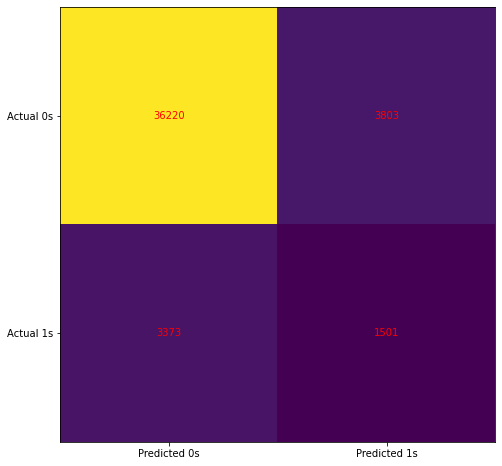

In [33]:
# Confusion Matrix Algoritma Naive Bayes
cm = confusion_matrix(nb_y_test, nb_y_pred)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Confusion Matrix dapat digunakan untuk menentukan akurasi dari model secara lebih mendalam. Confusion matrix menunjukkan 4 jenis angka, yaitu:
- True negatives
- False negatives
- False positives
- True positives

Confusion matrix dari setiap model/algoritma akan berbeda. Kita dapat menentukan algoritma mana yang akan kita gunakan berdasarkan confusion matrix, tergantung dari kasus yang dihadapi, mana yang lebih berbahaya apakah false negatives atau false positives. Dalam kasus prediksi kelulusan e-learning, seharusnya kita akan lebih memilih model yang memberikan nilai false positives lebih kecil, agar peserta e-learning tetap belajar

### Error Rate K Algoritma KNN

Text(0, 0.5, 'Error mean')

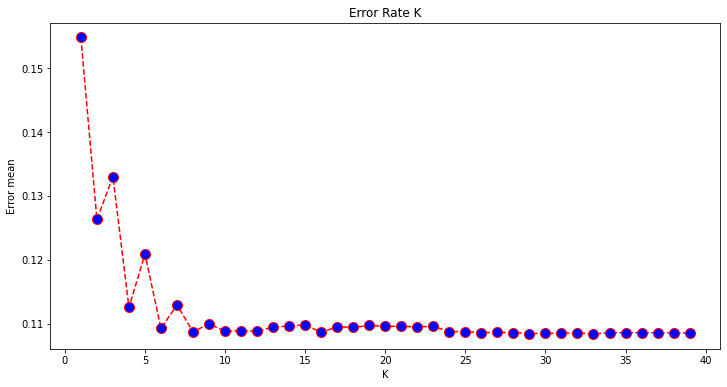

In [34]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knn_x_train, knn_y_train)
    pred_i = knn.predict(knn_x_test)
    error.append(np.mean(pred_i != knn_y_test))

# Plot Error Rate
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

Dari hasil plotting error rate tersebut, **model yang optimal dapat diperoleh dengan menentukan jumlah neighbor = 8**

### Feature Importance dari Random Forest

In [35]:
feature_importance = pd.Series(RF.feature_importances_, index=rf_x_train.columns).sort_values(ascending=False)
feature_importance

PRE TEST    0.764437
DIVISI      0.135633
HCBP        0.070207
CFU/FU      0.029723
dtype: float64

No handles with labels found to put in legend.


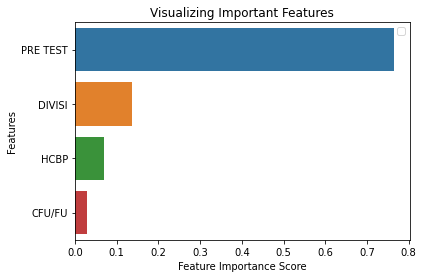

In [36]:
# Create bplot
sns.barplot(x=feature_importance, y=feature_importance.index)

# Tambahkan label
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Dari hasil tersebut, dapat dilihat bahwa nilai **Pre Test sangat penting untuk memprediksi kelulusan seseorang dalam e-Learning**

 ## Conclusion
  

In [37]:
print('Akurasi Logistic Regression: ', LR_acc)
print('Akurasi KNN: ', KNN_acc)
print('Akurasi Naive Bayes: ', NB_acc)
print('Akurasi Decision Tree: ', DT_acc)
print('Akurasi Random Forest: ', RF_acc)

Akurasi Logistic Regression:  0.8906385727331447
Akurasi KNN:  0.8912622224202063
Akurasi Naive Bayes:  0.8401674944873823
Akurasi Decision Tree:  0.8904158407020514
Akurasi Random Forest:  0.890393567498942


Dari hasil pengembangan model prediksi kelulusan e-learning yang sudah dilakukan, model yang memberikan akurasi tertinggi adalah **K-Nearest Neighbor**, dengan **jumlah neighbor di-set = 6**. Selain itu diperoleh bahwa **fitur yang paling penting dalam model prediksi ini adalah nilai Pre Test**, walaupun untuk memilih model mana yang sebaiknya digunakan **kita harus melihat confusion matrix** terlebih dahulu dan menentukan faktor apa yang lebih penting untuk digunakan.